<a href="https://colab.research.google.com/github/Sebas-gifPaz777/AI_Proyect/blob/main/Proyecto_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import h5py
import scipy
from scipy import ndimage
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam

from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier



**Carga de los datos**


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
total_signs=sorted(listdir("/gdrive/MyDrive/Proyecto_IA/asl_dataset"))

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


**Visualización de las imágenes según su categoría**


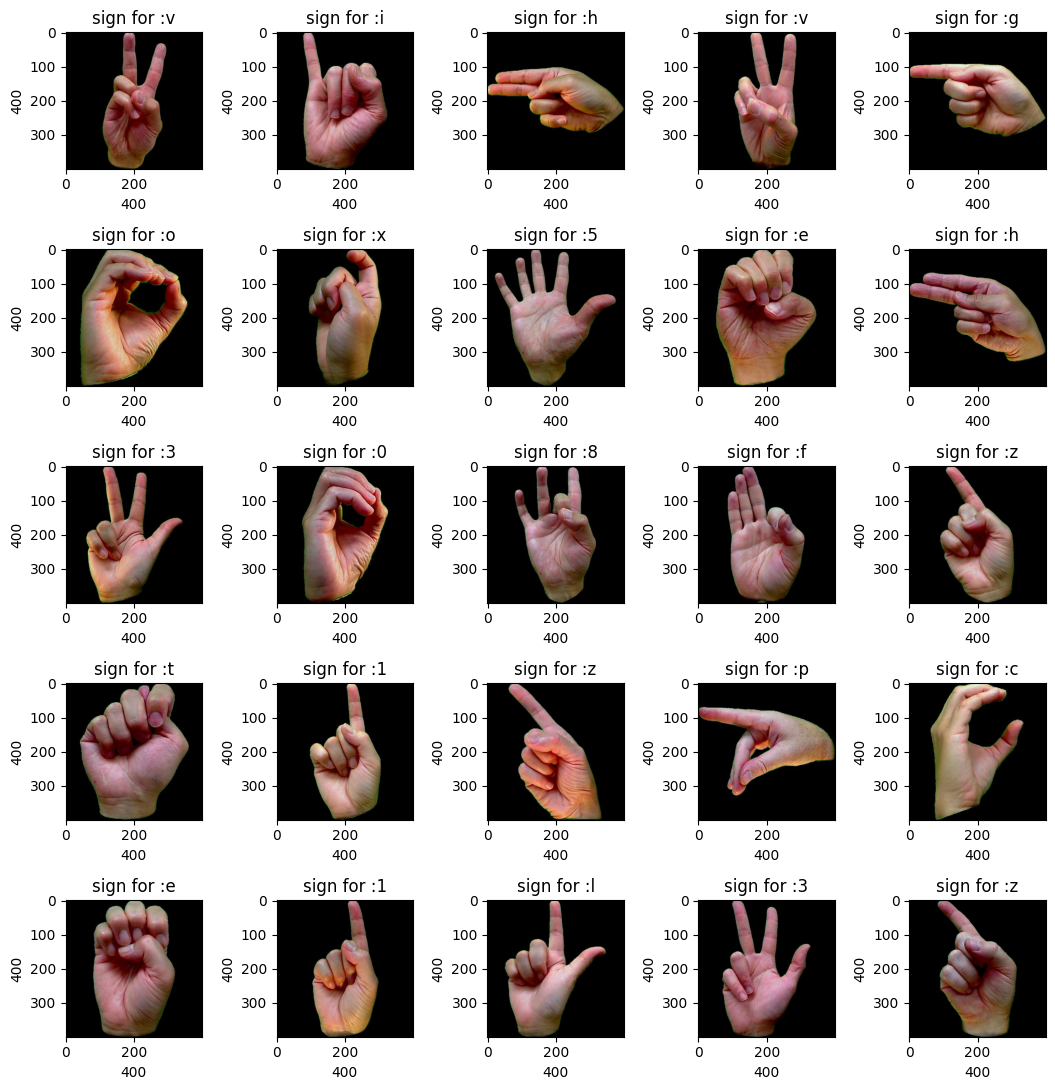

In [ ]:
plt.figure(figsize=(11,11))
path = "/gdrive/MyDrive/Proyecto_IA/asl_dataset"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    directry=random.choice(total_signs)
    rand_img = imread(path +'/'+ directry+'/'+random.choice(sorted(listdir(path+'/'+directry+'/'))))
    plt.imshow(rand_img)
    plt.title('sign for :'+directry)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [ ]:
dir1 = path
root_dir = listdir(dir1)
image_list, label_list = [], []

**Configuración del tamaño de las imagenes (400x400 a 50x50)**

In [ ]:

for directory in root_dir:
    for files in listdir(f"{dir1}/{directory}"):
        image_path = f"{dir1}/{directory}/{files}"
        image = Image.open(image_path)
        image = image.resize((50,50)) 
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [ ]:

label_counts = pd.DataFrame(label_list).value_counts()

In [ ]:
num_classes = len(label_counts)
num_classes

36

In [ ]:
np.array(image_list).shape

(2515, 50, 50, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(2515,)

**División del conjunto de imágenes**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [ ]:
x_train2=x_train.copy()
x_test2=x_test.copy()
y_train2=y_train.copy()
y_test2=y_test.copy()

**Transformación de las imagenes**

In [ ]:
x_train2 = np.array(x_train2, dtype=np.int32) / 225.0
x_test2 = np.array(x_test2, dtype=np.int32) / 225.0
x_train2_flatten= x_train2.reshape(x_train2.shape[0],x_train2.shape[1]*x_train2.shape[2]*x_train2.shape[3])
x_test2_flatten= x_test2.reshape(x_test2.shape[0],x_test2.shape[1]*x_test2.shape[2]*x_test2.shape[3])
print ("train_set_x_flatten shape: " + str(x_train2_flatten.shape))
print ("train_set_y shape: " + str(x_train2.shape))
print ("test_set_x_flatten shape: " + str(x_test2_flatten.shape))
print ("test_set_y shape: " + str(x_test2.shape))
print ("sanity check after reshaping: " + str(x_train2_flatten[0:5,0]))

**Clasificación utilizando Softmax**

**Clasificación por RandoForest**

In [ ]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 50,50,3)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape( -1, 50,50,3)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [ ]:
rf = RandomForestClassifier()

rf.fit(x_train_flat,y_train)
# Predicción en datos de entrenamiento
y_pred_train = rf.predict(x_train_flat)
    # Predicción en datos de prueba
y_pred_test = rf.predict(x_test_flat)
    # Metricas de entrenamiento
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_train))
    
    # Metrica de datos de prueba
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= y_test, y_pred= y_pred_test))


Training metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        63
           5       1.00      1.00      1.00        57
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        56
           8       1.00      1.00      1.00        59
           9       1.00      1.00      1.00        49
           a       1.00      1.00      1.00        55
           b       1.00      1.00      1.00        55
           c       1.00      1.00      1.00        56
           d       1.00      1.00      1.00        55
           e       1.00      1.00      1.00        59
           f       1.00      1.00      1.00        58
           g       1.00      1.00      1.00        53
         

**Clasificación por Redes Neuronales Convolucinales**

In [ ]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
import tensorflow as tf
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(50,50,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(90, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Flatten())

model.add(Dense(40, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 90)        26010     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 90)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 90)          72990     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 90)        

In [ ]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 150, epochs =20,validation_data=(x_val,y_val))

Epoch 1/20
11/11 [==============================] - 9s 746ms/step - loss: 3.5119 - accuracy: 0.0572 - val_loss: 3.3359 - val_accuracy: 0.0844
Epoch 2/20
11/11 [==============================] - 6s 518ms/step - loss: 3.0569 - accuracy: 0.1548 - val_loss: 2.6673 - val_accuracy: 0.3350
Epoch 3/20
11/11 [==============================] - 7s 642ms/step - loss: 2.1305 - accuracy: 0.4282 - val_loss: 1.6977 - val_accuracy: 0.5310
Epoch 4/20
11/11 [==============================] - 6s 536ms/step - loss: 1.3533 - accuracy: 0.6147 - val_loss: 1.1613 - val_accuracy: 0.6551
Epoch 5/20
11/11 [==============================] - 6s 507ms/step - loss: 0.9415 - accuracy: 0.6899 - val_loss: 0.9604 - val_accuracy: 0.6973
Epoch 6/20
11/11 [==============================] - 7s 627ms/step - loss: 0.7429 - accuracy: 0.7763 - val_loss: 0.7202 - val_accuracy: 0.7519
Epoch 7/20
11/11 [==============================] - 5s 488ms/step - loss: 0.5957 - accuracy: 0.8142 - val_loss: 0.7175 - val_accuracy: 0.7543
Epoch 

In [ ]:
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

16/16 [==============================] - 1s 31ms/step - loss: 0.2243 - accuracy: 0.9284
Test Accuracy: 92.84294247627258


In [ ]:
def one_hot(y, c):
  # Donde y es el arreglo que contiene los n samples y c es la cantidad de clases que hay (10 en este caso)


  # Creamos una matriz de ceros.
  y_hot = np.zeros((len(y), c))

  y_hot[np.arange(len(y)), y] = 1

  return y_hot

In [ ]:
def softmax(z):
  # Donde z es la parte lineal.

  exp = np.exp(z - np.max(z))

  for i in range(len(z)):
    exp[i] /= np.sum(exp[i])

  return exp

In [ ]:
def fit(X, y, lr, c, epochs):
  # X es un input, y contiene las imágenes del lenguaje de señas
  # y es el target y contiene los valores reales.
  # lr es el learning rate, que es lo que se usa para el gradient descent.
  # c es la cantidad de clases. En este caso son 36.
  # epochs es la cantidad de iteraciones.

  # m es la cantidad ejemplos de prueba
  # n es la cantidad de características de los datos de entrenamiento. 
  m, n = X.shape

  # Los pesos y bias
  # Inicialmente se les asigna un valor aleatorio, pues no importa mucho ya que se irán mejorando con el gradient descent.
  w = np.random.random((n, c))
  b = np.random.random(c)

  # Una lista vacía para guardar las pérdidas
  losses = []

  # El loop de entrenamiento
  for epoch in range(epochs):

    # El cálculo de la hipótesis o predicción
    # z es una predicción lineal que, después, se mandará al algoritmo softmax para hacerla no lineal.
    z = X@w + b
    y_hat = softmax(z)

    # One-hot encoding de y
    y_hot = one_hot(y, c)   

    # Cálculo del gradiente de pérdida 
    w_grad = (1/m) * np.dot(X.T, (y_hat - y_hot))
    b_grad = (1/m) * np.sum(y_hat - y_hot)

    # Actualización de los parámetros
    w = w - lr * w_grad
    b = b - lr * b_grad

    # Cálculo de la pérdida
    loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
    losses.append(loss)

    # Imprimiendo el output de las pérdidas cada 100 interaciones
    if epoch%100 == 0:
      #print('Epoch {epoch}==> Loss = {loss}'.format(epoch = epoch, loss = loss))
      print('Epoch {epoch}==> Loss = {loss}'
                  .format(epoch=epoch, loss=loss))
      

      print(y_hat)


  return w, b, losses

In [ ]:
w, b, l = fit(x_train2_flatten, y_train, lr = 0.9, c = num_classes, epochs = 1000)

In [ ]:
def predict(X, w, b):
  # X es el input de los datos que se quieren predecir.
  # w es el peso
  # b es el bias

  # Predicción lineal
  z = X@w + b
  
  y_hat = softmax(z)

  # Retorno de la clase con la probabilidad más grande
  return np.argmax(y_hat, axis = 1)

In [ ]:
def accuracy(y, y_hat):
  return np.sum(y == y_hat)/len(y)

In [ ]:
# Precisión del modelo
train_preds = predict(x_train2_flatten, w, b)
accuracy(y_train2, train_preds)

In [ ]:
x_test2_flatten = x_test2_flatten/255.0

test_preds = predict(x_test2_flatten, w, b)
accuracy(y_test2, test_preds)